# Image Colorization

This project aims to provide a professional solution for colorizing black and white images using Python.

In image colorization, the objective is to take a black and white image as input and produce a colored image. This project utilizes a deep neural network implemented with OpenCV.

### Lab Color Space:

In addition to RGB, Lab is another color space commonly used in image processing. It is a three-channel color space with the following channels:

* L channel: Represents the lightness of the image.
* a channel: Represents the green-red color components.
* b channel: Represents the blue-yellow color components.

Lab color space is advantageous for this project because the grayscale information of the image is primarily encoded in the L channel.

### Problem Statement:

The goal of this deep learning project is to predict the a and b channels given an input grayscale image.

To achieve this, we will utilize a pre-trained Caffe model along with a prototxt file and a NumPy file.

#### Steps to implement Image Colorization Project:

For colorizing black and white images we will be using a pre-trained caffe model, a prototxt file, and a NumPy file.

The prototxt file defines the network and the numpy file stores the cluster center points in numpy format.

### Create a directory named "models".

In [64]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


### Download the required files: the caffemodel, prototxt file, and the NumPy file

In [65]:
!wget https://github.com/richzhang/colorization/blob/caffe/colorization/resources/pts_in_hull.npy?raw=true -O ./pts_in_hull.npy


--2023-06-17 09:17:37--  https://github.com/richzhang/colorization/blob/caffe/colorization/resources/pts_in_hull.npy?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/richzhang/colorization/raw/caffe/colorization/resources/pts_in_hull.npy [following]
--2023-06-17 09:17:37--  https://github.com/richzhang/colorization/raw/caffe/colorization/resources/pts_in_hull.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/richzhang/colorization/caffe/colorization/resources/pts_in_hull.npy [following]
--2023-06-17 09:17:37--  https://raw.githubusercontent.com/richzhang/colorization/caffe/colorization/resources/pts_in_hull.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Conne

In [66]:
!wget https://raw.githubusercontent.com/richzhang/colorization/caffe/colorization/models/colorization_deploy_v2.prototxt -O ./models/colorization_deploy_v2.prototxt

--2023-06-17 09:17:37--  https://raw.githubusercontent.com/richzhang/colorization/caffe/colorization/models/colorization_deploy_v2.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9945 (9.7K) [text/plain]
Saving to: ‘./models/colorization_deploy_v2.prototxt’

./models/colorizati 100%[===================>]   9.71K  --.-KB/s    in 0s      

2023-06-17 09:17:38 (78.8 MB/s) - ‘./models/colorization_deploy_v2.prototxt’ saved [9945/9945]



In [67]:
!wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2.caffemodel -O ./models/colorization_release_v2.caffemodel


--2023-06-17 09:17:38--  http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2.caffemodel
Resolving eecs.berkeley.edu (eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1
Connecting to eecs.berkeley.edu (eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2.caffemodel [following]
--2023-06-17 09:17:38--  https://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2.caffemodel
Connecting to eecs.berkeley.edu (eecs.berkeley.edu)|23.185.0.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2.caffemodel [following]
--2023-06-17 09:17:38--  https://people.eecs.berkeley.edu/~rich.zhang/project

### Import the necessary libraries.

In [68]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os.path

### Read the black and white image and load the caffemodel.

In [69]:
frame = cv.imread("/content/test.jpg")

numpy_file = np.load('./pts_in_hull.npy')
Caffe_net = cv.dnn.readNetFromCaffe("/content/colorization_deploy_v2.prototxt", "/content/colorization_release_v2.caffemodel")


### Convert the image to RGB and display it.

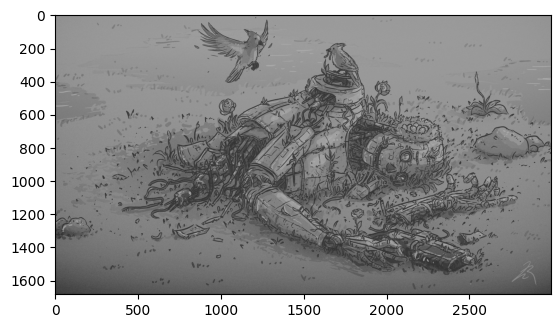

In [70]:


rgb_img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)		# this converts it into RGB
plt.imshow(rgb_img)
plt.show()

### Add layers to the caffe model.

In [71]:
numpy_file = numpy_file.transpose().reshape(2, 313, 1, 1)
Caffe_net.getLayer(Caffe_net.getLayerId('class8_ab')).blobs = [numpy_file.astype(np.float32)]
Caffe_net.getLayer(Caffe_net.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, np.float32)]

### Extract the L channel from the image and resize it.

In [72]:
input_width = 224
input_height = 224

rgb_img = (frame[:,:,[2, 1, 0]] * 1.0 / 255).astype(np.float32)
lab_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2Lab)
l_channel = lab_img[:,:,0]

l_channel_resize = cv.resize(l_channel, (input_width, input_height))
l_channel_resize -= 50

### Predict the ab channel and save the result.

In [73]:
Caffe_net.setInput(cv.dnn.blobFromImage(l_channel_resize))
ab_channel = Caffe_net.forward()[0,:,:,:].transpose((1,2,0))

(original_height,original_width) = rgb_img.shape[:2]
ab_channel_us = cv.resize(ab_channel, (original_width, original_height))
lab_output = np.concatenate((l_channel[:,:,np.newaxis],ab_channel_us),axis=2)
bgr_output = np.clip(cv.cvtColor(lab_output, cv.COLOR_Lab2BGR), 0, 1)

cv.imwrite("./result.png", (bgr_output*255).astype(np.uint8))

True

### Display the colorized image.


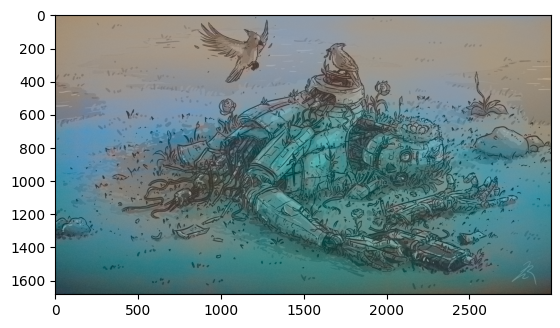

In [74]:
frame1 = cv.imread("result.png")
rgb_img = cv.cvtColor(frame1, cv.COLOR_BGR2RGB)		# this converts it into RGB
plt.imshow(rgb_img)
plt.show()


## GUI code for interactive usage.

In [75]:
%%writefile imageColorizationGUI.py

import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk
import os
import numpy as np
import cv2 as cv
import os.path
import matplotlib
matplotlib.use('Agg')

import sys
import os

if os.environ.get('DISPLAY','') == '':
    print('no display found. Using :0.0')
    os.environ.__setitem__('DISPLAY', ':0.0')

numpy_file = np.load('./pts_in_hull.npy')
Caffe_net = cv.dnn.readNetFromCaffe("./models/colorization_deploy_v2.prototxt", "./models/colorization_release_v2.caffemodel")
numpy_file = numpy_file.transpose().reshape(2, 313, 1, 1)

class Window(Frame):
    def __init__(self, master=None):
        Frame.__init__(self, master)

        self.master = master
        self.pos = []
        self.master.title("B&W Image Colorization")
        self.pack(fill=BOTH, expand=1)

        self.canvas_frame = Frame(self)
        self.canvas_frame.pack(side=TOP, padx=10, pady=10)

        self.original_canvas = tk.Canvas(self.canvas_frame)
        self.original_canvas.pack(side=LEFT, fill=tk.BOTH, expand=True)

        self.colorized_canvas = tk.Canvas(self.canvas_frame)
        self.colorized_canvas.pack(side=LEFT, fill=tk.BOTH, expand=True)

        self.button_frame = Frame(self)
        self.button_frame.pack(side=BOTTOM, padx=10, pady=10)

        self.upload_button = Button(self.button_frame, text="Upload Image", command=self.uploadImage)
        self.upload_button.pack(side=LEFT, padx=10, pady=10)

        self.color_button = Button(self.button_frame, text="Generate Color Image", command=self.color)
        self.color_button.pack(side=LEFT, padx=10, pady=10)

        self.original_image = None
        self.colorized_image = None

    def uploadImage(self):
        filename = filedialog.askopenfilename(initialdir=os.getcwd())
        if not filename:
            return
        load = Image.open(filename)

        load = load.resize((480, 360), Image.ANTIALIAS)

        if self.original_image is None:
            w, h = load.size
            self.original_render = ImageTk.PhotoImage(load)
            self.original_image = self.original_canvas.create_image((w / 2, h / 2), image=self.original_render)
        else:
            self.original_canvas.delete(self.original_image)
            w, h = load.size
            self.original_render = ImageTk.PhotoImage(load)
            self.original_image = self.original_canvas.create_image((w / 2, h / 2), image=self.original_render)

        frame = cv.imread(filename)

        Caffe_net.getLayer(Caffe_net.getLayerId('class8_ab')).blobs = [numpy_file.astype(np.float32)]
        Caffe_net.getLayer(Caffe_net.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, np.float32)]

        input_width = 224
        input_height = 224

        rgb_img = (frame[:,:,[2, 1, 0]] * 1.0 / 255).astype(np.float32)
        lab_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2Lab)
        l_channel = lab_img[:,:,0]

        l_channel_resize = cv.resize(l_channel, (input_width, input_height))
        l_channel_resize -= 50

        Caffe_net.setInput(cv.dnn.blobFromImage(l_channel_resize))
        ab_channel = Caffe_net.forward()[0,:,:,:].transpose((1,2,0))

        (original_height,original_width) = rgb_img.shape[:2]
        ab_channel_us = cv.resize(ab_channel, (original_width, original_height))
        lab_output = np.concatenate((l_channel[:,:,np.newaxis],ab_channel_us),axis=2)
        bgr_output = np.clip(cv.cvtColor(lab_output, cv.COLOR_Lab2BGR), 0, 1)

        cv.imwrite("./result.png", (bgr_output*255).astype(np.uint8))

    def color(self):
        load = Image.open("./result.png")
        load = load.resize((480, 360), Image.ANTIALIAS)

        if self.colorized_image is None:
            w, h = load.size
            self.colorized_render = ImageTk.PhotoImage(load)
            self.colorized_image = self.colorized_canvas.create_image((w / 2, h / 2), image=self.colorized_render)
        else:
            self.colorized_canvas.delete(self.colorized_image)
            w, h = load.size
            self.colorized_render = ImageTk.PhotoImage(load)
            self.colorized_image = self.colorized_canvas.create_image((w / 2, h / 2), image=self.colorized_render)

root = tk.Tk()
root.geometry("1000x400")
root.title("B&W Image Colorization GUI")

app = Window(root)
app.pack(fill=tk.BOTH, expand=1)
root.mainloop()


Overwriting imageColorizationGUI.py


## Summary:

This notebook provides a professional implementation for colorizing black and white images. It explains the Lab color space and its suitability for this task. The step-by-step process demonstrates how to use a pre-trained Caffe model to achieve black and white image colorization. Additionally, it includes code for a graphical user interface (GUI) for a more interactive experience.